In [10]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
train_df = pd.read_parquet("data/train-00000-of-00001.parquet")

In [12]:
domains = set(train_df["dagw_domain"])

vocabularies = {domain: set() for domain in domains}

for line in train_df.iterrows():
     vocabularies[line[1]["dagw_domain"]].update(line[1]["text"].split(" "))

def jaccard(setA: set, setB: set) -> float:
     if setA == setB: return 0
     return len(setA.intersection(setB)) / len(setA.union(setB))

jaccard_dict = {domain: dict() for domain in domains}
for domain_a in domains:
     for domain_b in domains:
          jaccard_dict[domain_a][domain_b] = jaccard(vocabularies[domain_a],vocabularies[domain_b])

Text(0.5, 1.0, 'jaccard simmilarity between vocabularies')

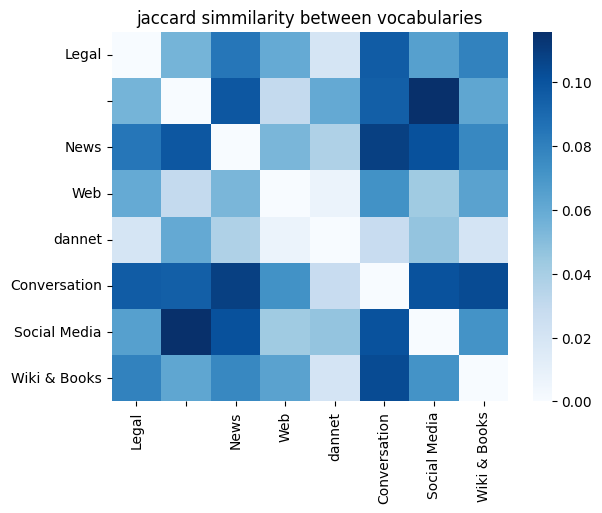

In [13]:
jaccard_df = pd.DataFrame(jaccard_dict)
sns.heatmap(jaccard_df, cmap=sns.color_palette("Blues", as_cmap=True))
plt.title("jaccard simmilarity between vocabularies")

In [14]:
domains = set(train_df["dagw_domain"])

vocabularies = {domain: set() for domain in domains}

for line in train_df.iterrows():
     vocabularies[line[1]["dagw_domain"]].update(line[1]["text"].split(" "))

def jaccard(setA: set, setB: set) -> float:
     if setA == setB: return 0
     return len(setA.intersection(setB)) / len(setA.union(setB))

jaccard_dict = {domain: dict() for domain in domains}
for domain_a in domains:
     for domain_b in domains:
          jaccard_dict[domain_a][domain_b] = jaccard(vocabularies[domain_a],vocabularies[domain_b])
domains.remove(None)

In [15]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(train_df["text"])]

model = Doc2Vec(documents, vector_size=100, min_count=2, workers=4)

vectors = dict()
for domain in domains:
    vectors[domain] = model.infer_vector(train_df["text"][train_df["dagw_domain"] == domain]).reshape((1,-1))

simmilarity_dict = {domain: dict() for domain in domains}
for domain_a in domains:
     for domain_b in domains:
        simmilarity_dict[domain_a][domain_b] = cosine_similarity(vectors[domain_a], vectors[domain_b])[0][0]
        
print(simmilarity_dict)

{'Legal': {'Legal': 1.0, 'News': 0.60214424, 'Web': 0.77856225, 'dannet': 0.11003916, 'Conversation': 0.43333086, 'Social Media': -0.15016676, 'Wiki & Books': 0.37658346}, 'News': {'Legal': 0.60214424, 'News': 1.0, 'Web': 0.7499387, 'dannet': 0.051281728, 'Conversation': 0.90381193, 'Social Media': -0.0047276765, 'Wiki & Books': 0.5774838}, 'Web': {'Legal': 0.77856225, 'News': 0.7499387, 'Web': 1.0000001, 'dannet': 0.103075445, 'Conversation': 0.65690625, 'Social Media': -0.049722746, 'Wiki & Books': 0.5764296}, 'dannet': {'Legal': 0.11003916, 'News': 0.051281728, 'Web': 0.103075445, 'dannet': 0.9999999, 'Conversation': 0.10463038, 'Social Media': -0.03342299, 'Wiki & Books': 0.17996547}, 'Conversation': {'Legal': 0.43333086, 'News': 0.90381193, 'Web': 0.65690625, 'dannet': 0.10463038, 'Conversation': 1.0, 'Social Media': 0.082451455, 'Wiki & Books': 0.52673376}, 'Social Media': {'Legal': -0.15016676, 'News': -0.0047276765, 'Web': -0.049722746, 'dannet': -0.03342299, 'Conversation': 0.

Text(0.5, 1.0, 'Cosine similarity between doc2vec')

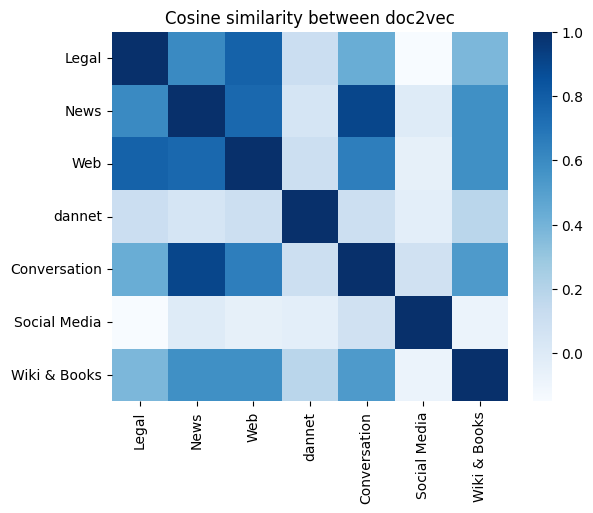

In [16]:
simmilarity_df = pd.DataFrame(simmilarity_dict)
sns.heatmap(simmilarity_df, cmap=sns.color_palette("Blues", as_cmap=True))
plt.title("Cosine similarity between doc2vec")